In [1]:
import json
import requests
from citipy import citipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from config import api_key

In [2]:
city_df = pd.DataFrame({"lat":np.random.uniform(-90, 90, 1500), "lng":np.random.uniform(-180, 180, 1500)})
city_df.head()

,lat,lng
0,48.623807,-48.552010
1,12.172050,147.072553
2,-87.363321,-80.372104
3,-64.575687,51.483809
4,20.751225,-20.602373


In [3]:
city_names = []
country_names = []

for i in range(0,len(city_df.lat)):
    lat = city_df.iloc[i].lat
    lng = city_df.iloc[i].lng
    city = citipy.nearest_city(lat,lng)
    city_names.append(city.city_name)
    country_names.append(city.country_code)

city_df["City"]=city_names
city_df["Country"]=country_names
unique_df = city_df.drop_duplicates("City", keep='first')
unique_df.head()

,lat,lng,City,Country
0,48.623807,-48.552010,torbay,ca
1,12.172050,147.072553,airai,pw
2,-87.363321,-80.372104,ushuaia,ar
3,-64.575687,51.483809,east london,za
4,20.751225,-20.602373,nouadhibou,mr


In [4]:

temp = []
hum=[]
cloud=[]
wind=[]
lat=[]
lng=[]

url = "http://api.openweathermap.org/data/2.5/weather?"

for index, row in unique_df.iterrows():
    query_url = f'{url}appid={api_key}&q={row["City"]}&units=imperial'
    response = requests.get(query_url).json()
    print(f'{index} {row["City"]}')
    try:
        temp.append(response['main']['temp'])
    except:
        temp.append(np.nan)
        print(f"{index} Missing info")
    try:
        hum.append(response['main']['humidity'])
    except:
        hum.append(np.nan)
        print(f"{index} Missing info")
    try:
        cloud.append(response['clouds']['all'])
    except:
        cloud.append(np.nan)
        print(f"{index} Missing info")
    try:
        wind.append(response['wind']['speed'])
    except:
        wind.append(np.nan)
        print(f"{index} Missing info")
    try:
        lat.append(response['coord']['lat'])
    except:
        lat.append(np.nan)
        print(f"{index} Missing info")
    try:
        lng.append(response['coord']['lon'])
    except:
        lng.append(np.nan)
        print(f"{index} Missing info")

0 torbay
1 airai
2 ushuaia
3 east london
4 nouadhibou
5 broome
7 punta arenas
8 qaanaaq
10 fort nelson
12 east wenatchee bench
13 eganville
15 victoria
16 tsihombe
16 Missing info
16 Missing info
16 Missing info
16 Missing info
16 Missing info
16 Missing info
17 tura
18 jamestown
19 cherskiy
20 ayorou
21 polson
22 taoudenni
23 ketchikan
24 anadyr
25 arawa
26 amderma
26 Missing info
26 Missing info
26 Missing info
26 Missing info
26 Missing info
26 Missing info
27 paracelis
29 sur
30 pinega
31 port elizabeth
32 kosh-agach
33 geraldton
34 mataura
35 tuktoyaktuk
36 honiara
40 rikitea
41 kapaa
43 talaya
44 haines junction
45 mildura
47 atuona
48 bredasdorp
49 yumen
50 albany
51 kenai
53 karkaralinsk
53 Missing info
53 Missing info
53 Missing info
53 Missing info
53 Missing info
53 Missing info
54 coihaique
55 hermanus
56 kamenskoye
56 Missing info
56 Missing info
56 Missing info
56 Missing info
56 Missing info
56 Missing info
57 avarua
58 yerbogachen
59 chuy
60 katsuura
61 rivadavia
63 ata

718 rio gallegos
720 luanda
721 mackay
724 george town
726 victor harbor
727 aklavik
729 saleaula
729 Missing info
729 Missing info
729 Missing info
729 Missing info
729 Missing info
729 Missing info
732 vila
736 buckeye
740 hvolsvollur
743 ancud
746 pecanha
754 halifax
755 santa cruz de la palma
756 svetlogorsk
758 vetluzhskiy
760 olafsvik
764 coquimbo
767 rong kwang
769 guerrero negro
772 muli
773 cabra
775 rio grande
777 peace river
780 manitouwadge
781 magadan
788 hambantota
789 yining
791 bacabal
793 gremyachye
793 Missing info
793 Missing info
793 Missing info
793 Missing info
793 Missing info
793 Missing info
794 henties bay
795 alta floresta
796 rancho palos verdes
807 zheleznodorozhnyy
812 sumbawa
812 Missing info
812 Missing info
812 Missing info
812 Missing info
812 Missing info
812 Missing info
818 la victoria
819 mendahara
819 Missing info
819 Missing info
819 Missing info
819 Missing info
819 Missing info
819 Missing info
820 saint-francois
825 university park
827 lewisto

In [5]:
new_df = pd.DataFrame({"lat": lat, "lng": lng, "Temp": temp, \
                          "Humidity":hum, "Cloudiness": cloud, \
                          "Wind_Speed": wind, "City":unique_df.City,\
                           "Country":unique_df.Country})

new_df["lat"]=pd.to_numeric(new_df["lat"], errors='coerce')
new_df["lng"]=pd.to_numeric(new_df["lng"], errors='coerce')
new_df["Temp"]=pd.to_numeric(new_df["Temp"], errors='coerce')
new_df["Humidity"]=pd.to_numeric(new_df["Humidity"], errors='coerce')
new_df["Cloudiness"]=pd.to_numeric(new_df["Cloudiness"], errors='coerce')
new_df["Wind_Speed"]=pd.to_numeric(new_df["Wind_Speed"], errors='coerce')

clean_df = new_df.dropna().head(500)

clean_df.to_csv("Weather_data.csv")
clean_df.head()

,lat,lng,Temp,Humidity,Cloudiness,Wind_Speed,City,Country
0,47.6666,-52.7314,45.68,49.0,20.0,14.97,torbay,ca
1,-8.9266,125.4092,60.35,72.0,22.0,1.83,airai,pw
2,-54.8000,-68.3000,50.00,71.0,75.0,14.97,ushuaia,ar
3,-33.0153,27.9116,67.84,64.0,100.0,9.64,east london,za
4,20.9310,-17.0347,66.20,82.0,0.0,14.97,nouadhibou,mr


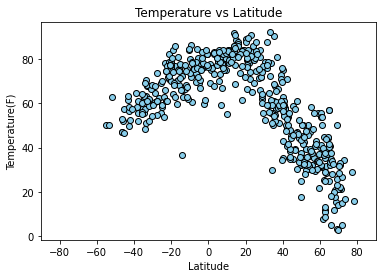

This chart calculates the relationship between a city's distance from the equator and its temperature.


In [6]:
plt.scatter(clean_df.lat, clean_df.Temp, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.title("Temperature vs Latitude")
plt.xlim(-90, 90)
plt.autoscale
plt.savefig("Temperature vs Latitude.png")
plt.show()
print("This chart calculates the relationship between a city's distance from the equator and its temperature.")

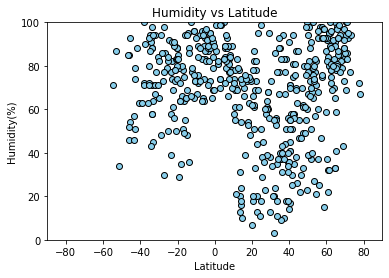

This chart calculates the relationship between a city's distance from the equator and its humidity.


In [7]:
plt.scatter(clean_df.lat, clean_df.Humidity, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Humidity vs Latitude")
plt.xlim(-90, 90)
plt.ylim(0, 100)
plt.autoscale
plt.savefig("Humidity vs Latitude.png")
plt.show()
print("This chart calculates the relationship between a city's distance from the equator and its humidity.")

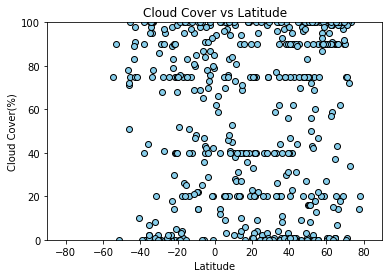

This chart calculates the relationship between a city's distance from the equator and its cloud cover.


In [8]:
plt.scatter(clean_df.lat, clean_df.Cloudiness, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover(%)")
plt.title("Cloud Cover vs Latitude")
plt.xlim(-90, 90)
plt.ylim(0, 100)
plt.autoscale
plt.savefig("Cloud Cover vs Latitude.png")
plt.show()
print("This chart calculates the relationship between a city's distance from the equator and its cloud cover.")

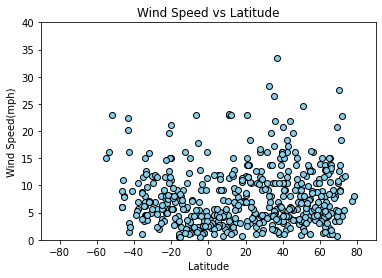

This chart calculates the relationship between a city's distance from the equator and its wind speed.


In [9]:
plt.scatter(clean_df.lat, clean_df.Wind_Speed, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Wind Speed vs Latitude")
plt.xlim(-90, 90)
plt.ylim(0, 40)
plt.autoscale
plt.savefig("Wind Speed vs Latitude.png")
plt.show()
print("This chart calculates the relationship between a city's distance from the equator and its wind speed.")

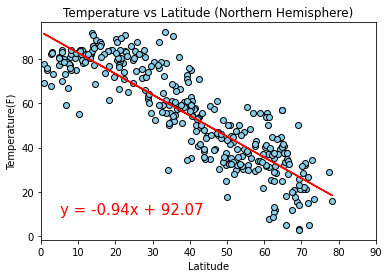

The linear regression demonstrates a negative relationship between temperature and latitude in the Northern Hemisphere. It is expected based on this model that it becomes colder as one travels north.


In [10]:
x_values = clean_df.lat.loc[clean_df.lat>=0]
y_values = clean_df.Temp.loc[clean_df.lat>=0]
plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.title("Temperature vs Latitude (Northern Hemisphere)")
plt.xlim(0, 90)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.autoscale
plt.savefig("Temperature vs Latitude NH.png")
plt.show()
print("The linear regression demonstrates a negative relationship between temperature and latitude in the Northern Hemisphere. \
It is expected based on this model that it becomes colder as one travels north.")

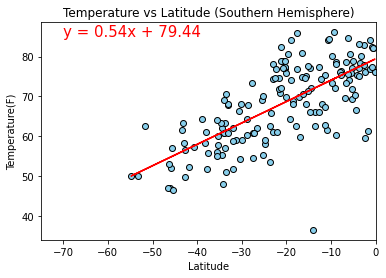

The linear regression demonstrates a positive relationship between temperature and latitude in the Southern Hemisphere. It is expected based on this model that it becomes colder as one travels south.


In [11]:
x_values = clean_df.lat.loc[clean_df.lat<0]
y_values = clean_df.Temp.loc[clean_df.lat<0]
plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.title("Temperature vs Latitude (Southern Hemisphere)")
plt.xlim(-75, 0)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-70, 85),fontsize=15,color="red")
plt.autoscale
plt.savefig("Temperature vs Latitude SH.png")
plt.show()
print("The linear regression demonstrates a positive relationship between temperature and latitude in the Southern Hemisphere. \
It is expected based on this model that it becomes colder as one travels south.")

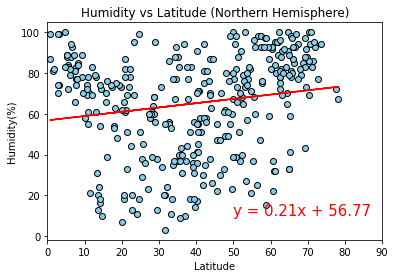

The linear regression demonstrates a positive relationship between humidity and latitude in the Northern Hemisphere. It is expected based on this model that it becomes more humid as one travels north.


In [12]:
x_values = clean_df.lat.loc[clean_df.lat>=0]
y_values = clean_df.Humidity.loc[clean_df.lat>=0]
plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Humidity vs Latitude (Northern Hemisphere)")
plt.xlim(0, 90)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.autoscale
plt.savefig("Humidity vs Latitude NH.png")
plt.show()
print("The linear regression demonstrates a positive relationship between humidity and latitude in the Northern Hemisphere. \
It is expected based on this model that it becomes more humid as one travels north.")

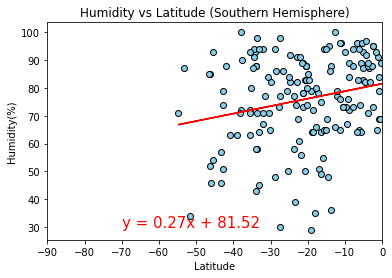

The linear regression demonstrates a negative relationship between humidity and latitude in the Southern Hemisphere. It is expected based on this model that it becomes more humid as one travels north.


In [13]:
x_values = clean_df.lat.loc[clean_df.lat<0]
y_values = clean_df.Humidity.loc[clean_df.lat<0]
plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Humidity vs Latitude (Southern Hemisphere)")
plt.xlim(-90, 0)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-70, 30),fontsize=15,color="red")
plt.autoscale
plt.savefig("Humidity vs Latitude SH.png")
plt.show()
print("The linear regression demonstrates a negative relationship between humidity and latitude in the Southern Hemisphere. \
It is expected based on this model that it becomes more humid as one travels north.")

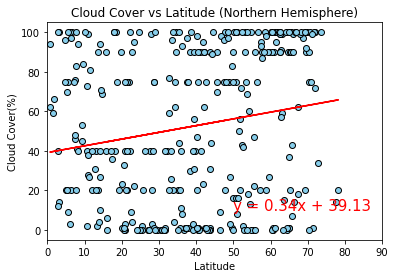

The linear regression demonstrates a positive relationship between cloud cover and latitude in the Northern Hemisphere. It is expected based on this model that it becomes more cloudy as one travels north.


In [14]:
x_values = clean_df.lat.loc[clean_df.lat>=0]
y_values = clean_df.Cloudiness.loc[clean_df.lat>=0]
plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover(%)")
plt.title("Cloud Cover vs Latitude (Northern Hemisphere)")
plt.xlim(0, 90)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.autoscale
plt.savefig("Cloud Cover vs Latitude NH.png")
plt.show()
print("The linear regression demonstrates a positive relationship between cloud cover and latitude in the Northern Hemisphere. \
It is expected based on this model that it becomes more cloudy as one travels north.")

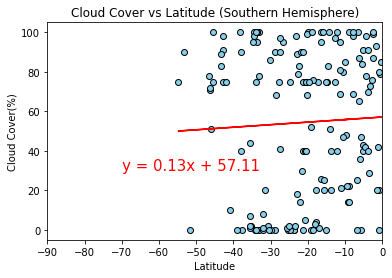

The linear regression demonstrates a positive relationship between cloud cover and latitude in the Southern Hemisphere. It is expected based on this model that it becomes more cloudy as one travels north.


In [15]:
x_values = clean_df.lat.loc[clean_df.lat<0]
y_values = clean_df.Cloudiness.loc[clean_df.lat<0]
plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover(%)")
plt.title("Cloud Cover vs Latitude (Southern Hemisphere)")
plt.xlim(-90,0)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-70, 30),fontsize=15,color="red")
plt.autoscale
plt.savefig("Cloud Cover vs Latitude SH.png")
plt.show()
print("The linear regression demonstrates a positive relationship between cloud cover and latitude in the Southern Hemisphere. \
It is expected based on this model that it becomes more cloudy as one travels north.")

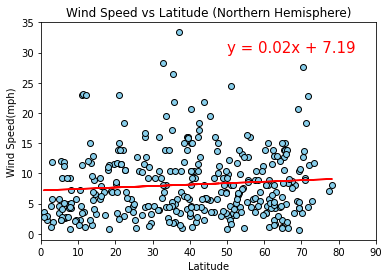

The linear regression demonstrates a positive relationship between wind speed and latitude in the Northern Hemisphere. It is expected based on this model that it becomes more windy as one travels north.


In [16]:
x_values = clean_df.lat.loc[clean_df.lat>=0]
y_values = clean_df.Wind_Speed.loc[clean_df.lat>=0]
plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Wind Speed vs Latitude (Northern Hemisphere)")
plt.xlim(0, 90)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
plt.autoscale
plt.savefig("Wind Speed vs Latitude NH.png")
plt.show()
print("The linear regression demonstrates a positive relationship between wind speed and latitude in the Northern Hemisphere. \
It is expected based on this model that it becomes more windy as one travels north.")

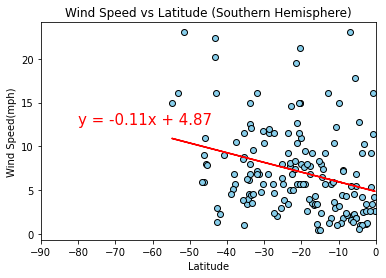

The linear regression demonstrates a negative relationship between wind speed and latitude in the Southern Hemisphere. It is expected based on this model that it becomes less windy as one travels north.


In [17]:
x_values = clean_df.lat.loc[clean_df.lat<0]
y_values = clean_df.Wind_Speed.loc[clean_df.lat<0]
plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Wind Speed vs Latitude (Southern Hemisphere)")
plt.xlim(-90, 0)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,12.5),fontsize=15,color="red")
plt.autoscale
plt.savefig("Wind Speed vs Latitude SH.png")
plt.show()
print("The linear regression demonstrates a negative relationship between wind speed and latitude in the Southern Hemisphere. \
It is expected based on this model that it becomes less windy as one travels north.")